**Table of contents**<a id='toc0_'></a>    
- [**Line Chart**](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing Trends (Showing Comparisons over time)

- <i> **Questions:**
1. What changed today from yesterday?
2. How does time of year affect sales, results, outcomes, etc.?
3. What times are the most popular? Least popular?

- **Insight:** change over time, cycles, or comparisons over time.

- **Data:** time dimension such as year, month, day, hour, minute, second, date, quarter, season, century, decade, etc.

- **Chart options:** line chart, sparkline. The bubble, vertical bar charts are options as well. </i>

## <a id='toc1_'></a>[**Line Chart**](#toc0_)

Line charts show the **change over time for one or more series** (e.g. sales per hour). The line connects each data point in the series (shown or not). 

**`Caution:`** With time series data, beware of interpolation, a method of constructing new data points within the range of a discrete set of known data points. If you do not have many known values, consider plotting each data point without a line; a line chart could lead to incorrect estimated values.

`->` When to use Line charts

- When we have a **continuous dataset that changes over time**.
- To display **multiple series for the same timeline**.
- To visualize **trends** instead of exact values.

`->` When to avoid Line charts

- Line charts work better with bigger datasets, so, if you have a small one, use a bar chart instead.

`->` Best practices for Line charts

- The y-axis baseline should be equal or less than the minimum value in the data.
- Show four or fewer series of lines on a line chart
- Label each series directly or use an ordered legend.

> `To draw` a line chart in seaborn, we will use the `seaborn.relplot(data, x, y, kind='line')` function. 
The detailed documentation can be found at, https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets.

- `hue:` Grouping variable that will produce lines with different colors. Adding a hue semantic with 'n' levels splits the plot into 'n' lines and error bands, coloring each to indicate which subset of the data they correspond to.
- `size:` Grouping variable that will produce lines with different widths. 
- `style:` Grouping variable that will produce lines with different dashes and/or markers. Adding a style semantic to a line plot changes the pattern of dashes in the line (by default). But, the style of the markers can also be changed along with or separately from the style of the dashes. 

It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

<u> Function Parameters </u>
 
- `row`, `col:` vectors or keys in data. Variables that define subsets to plot on different facets.
- `col_wrap (int):` “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.
- `palette:` string, list, dict, or matplotlib.colors.Colormap. Method for choosing the colors to use when mapping the hue semantic.
- `sizes:` An object that determines how sizes are chosen when size is used. List or dict arguments should provide a size for each unique data value, which forces a categorical interpretation. The argument may also be a min, max tuple.
- `dashes:` Object determining how to draw the lines for different levels of the style variable.
- `markers:` Object determining how to draw the markers for different levels of the style variable.
- `estimator:` Method for aggregating across multiple observations of the y variable at the same x level. Complex datasets may have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.

**Returns:** A FacetGrid Object.

> **`Note:`** We can also use the, `seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, sizes=None, dashes=True, markers=None, estimator='mean', errorbar=('ci', 95), err_style='band', legend='auto', ax=None, **kwargs)` function to draw lineplots in seaborn. One advantage of this method is that it returns the matplotlib Axes containing the plot instead of a FacetGrid. As a result it's easier to modify the plot using matplotlib. Also, this function can receive a pre-existing axes for plotting. See the documentation @https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [3]:
# loading the flights dataset
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='month', ylabel='passengers'>

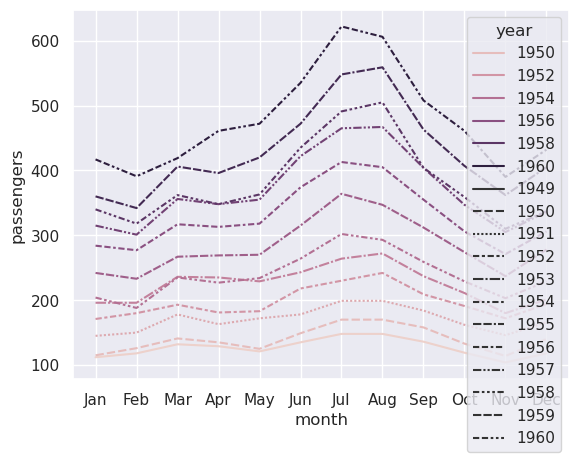

In [4]:
sns.lineplot(df, x="month", y="passengers", hue="year", style="year")

`->` A more suitable plot for representing this data maybe a heatmap.

In [5]:
df_heatmap = df.pivot_table(index="year", columns="month", values="passengers")

In [6]:
df_heatmap.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='month', ylabel='year'>

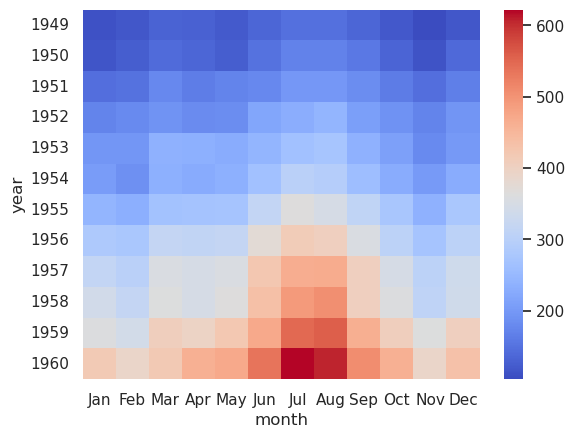

In [9]:

sns.heatmap(df_heatmap, cmap="coolwarm")